# DECISION TREE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
pd.ExcelFile('heart_disease.xlsx').sheet_names

['Description', 'Heart_disease']

In [4]:
data = pd.read_excel('heart_disease.xlsx', sheet_name=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# Handled using median (old peak)

data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### Distribution of numerical features

<Figure size 1200x1000 with 0 Axes>

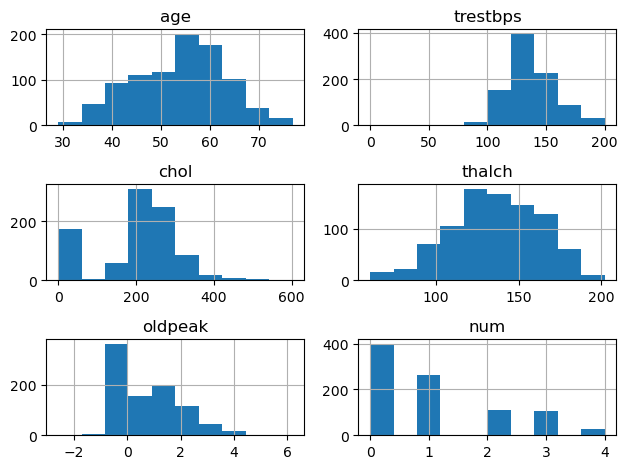

In [9]:
plt.figure(figsize=(12,10))
data.hist(bins=10)
plt.tight_layout()
plt.show()

#### Box plots (outlier detection)

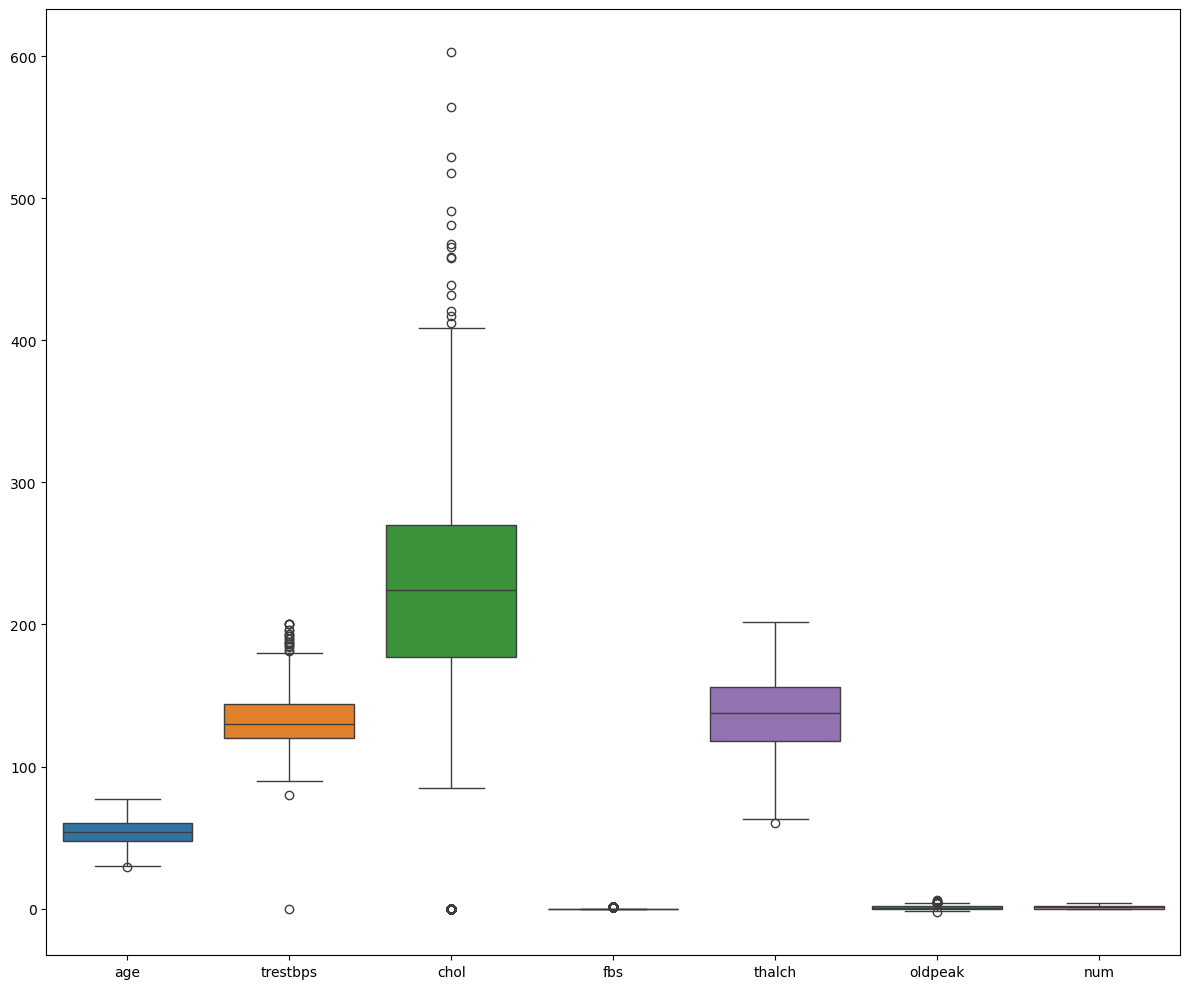

In [10]:
plt.figure(figsize=(12,10))
sns.boxplot(data)
plt.tight_layout()
plt.show()

## Encoding the categorical 

In [11]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


#### Encode boolean-like columns

In [13]:
data['fbs'] = data['fbs'].map({True:1, False:0})
data['exang'] = data['exang'].map({True:1, False:0})

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,0.0,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,0.0,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,0.0,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,0.0,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,1.0,1.5,flat,fixed defect,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     853 non-null    float64
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 92.3+ KB


In [16]:
data['exang'].fillna(data['exang'].median(), inplace=True)

#### Encode Categorical Strings

In [17]:
# for this doing Label Encoding

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LE.fit_transform(data[col])

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0.0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0.0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0.0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0.0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1.0,1.5,1,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    float64
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 92.3 KB


In [19]:
## for feature , saving this file

data.to_csv('heart_disease_DT_modify.csv', index=False)

In [20]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,0.790749,0.777533,133.430617,201.484581,0.203744,0.991189,135.957048,0.371145,0.864537,1.155286,1.192731,1.008811
std,9.158031,0.406998,0.958374,20.401608,112.097949,0.403003,0.635177,26.804929,0.483378,1.060433,0.691023,0.768216,1.144436
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.750000,1.000000,0.000000,120.000000,176.750000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


### Correlation matrix

In [21]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.143744,0.217942,-0.054644,0.029686,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.154214,0.088802,-0.045065,0.083287,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.359444,-0.174732,0.092177,-0.065993,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.093340,0.134945,0.006748,0.043168,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.040070,0.032205,0.047292,-0.031506,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,-0.015066,0.008154,-0.026636,-0.041507,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.025026,-0.048425,-0.084796,-0.104973,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.285956,-0.112624,0.224048,-0.063634,-0.323058
exang,0.143744,0.154214,-0.359444,0.093340,-0.040070,-0.015066,0.025026,-0.285956,1.000000,0.390715,-0.152929,0.104065,0.344856
oldpeak,0.217942,0.088802,-0.174732,0.134945,0.032205,0.008154,-0.048425,-0.112624,0.390715,1.000000,-0.184311,0.034114,0.406078


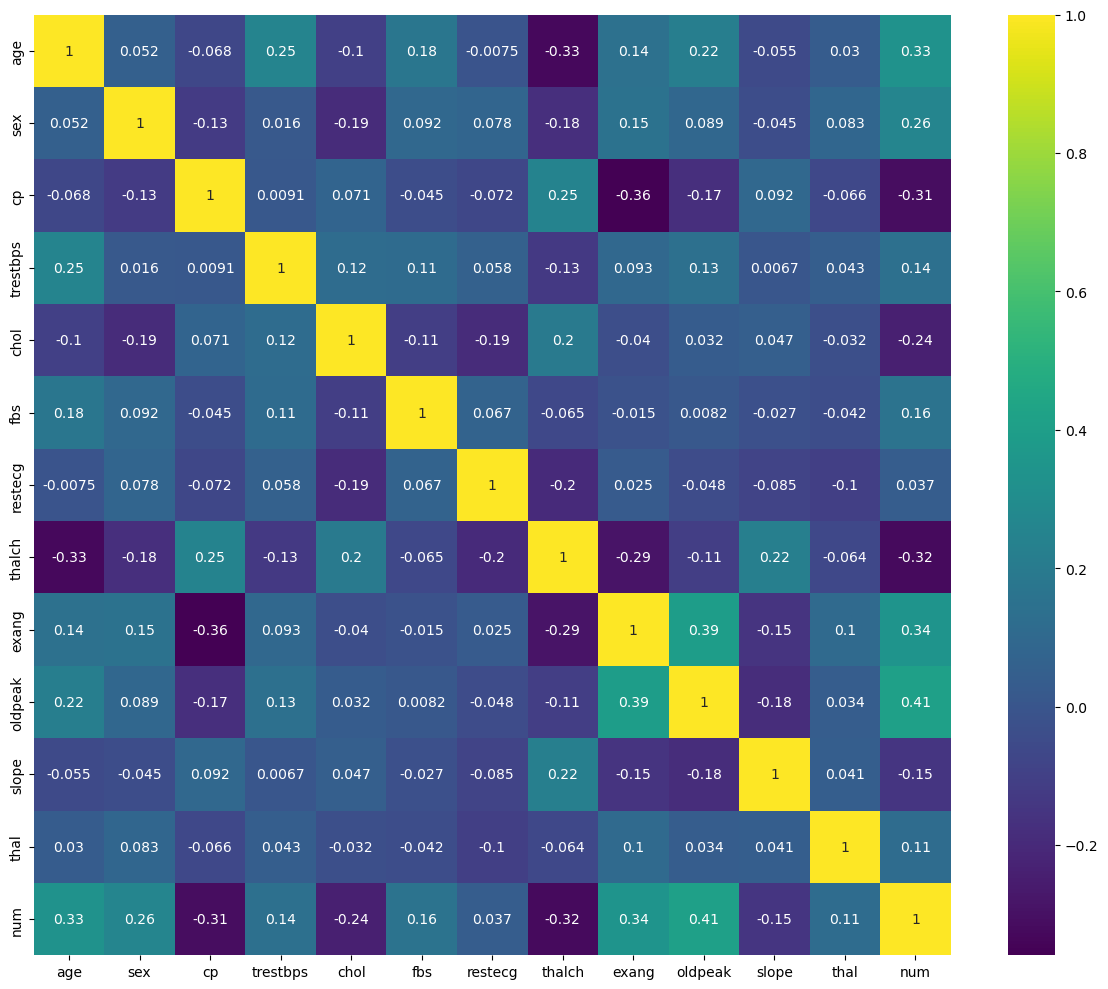

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.show()

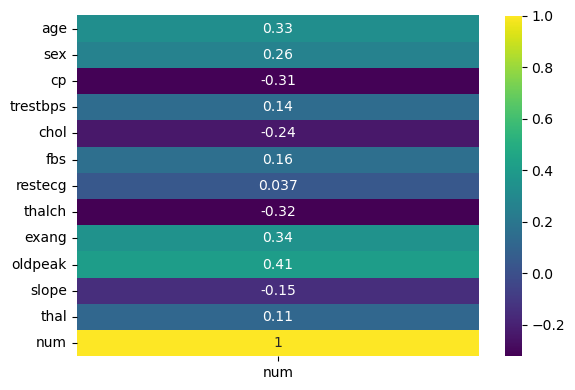

In [23]:
# correlation with target 'num'
plt.figure(figsize=(6,4))
sns.heatmap(data.corr()[['num']], annot=True, cmap='viridis')
plt.tight_layout()
plt.show()

#### Split features & Target

In [24]:
X = data.drop(columns=['num'])
y = data['num']

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0.0,2.3,0,0
1,41,1,1,135,203,0,1,132,0.0,0.0,1,0
2,57,1,0,140,192,0,1,148,0.0,0.4,1,0
3,52,1,3,118,186,0,0,190,0.0,0.0,1,0
4,57,1,0,110,201,0,1,126,1.0,1.5,1,0


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [27]:
y.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [28]:
y.value_counts(normalize=True)

num
0    0.439427
1    0.291850
2    0.120044
3    0.117841
4    0.030837
Name: proportion, dtype: float64

### Train, Test & Split the Data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((726, 12), (182, 12), (726,), (182,))

# Decision Tree Model fitting

In [30]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

DT = DecisionTreeClassifier(random_state=42, class_weight='balanced')
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

#### Validation on Train Data

In [31]:
y_pred_train = DT.predict(X_train)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
def evaluate_DT(y, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accu = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print('Accuracy for testing :', np.round(accu, 3))
    print('Precision for testing:', np.round(prec, 3))
    print('Recall for testing   :', np.round(recall, 3))
    print('F1 for testing       :', np.round(f1, 3))

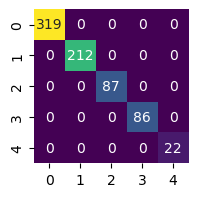

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

Accuracy for testing : 1.0
Precision for testing: 1.0
Recall for testing   : 1.0
F1 for testing       : 1.0


In [34]:
plt.figure(figsize=(2,2))
CM = confusion_matrix(y_train, y_pred_train)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_train))
evaluate_DT(y_train, y_pred_train)

#### Validation on Testing Data

In [35]:
y_pred_test = DT.predict(X_test)

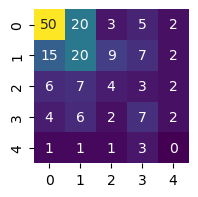

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        80
           1       0.37      0.38      0.37        53
           2       0.21      0.18      0.20        22
           3       0.28      0.33      0.30        21
           4       0.00      0.00      0.00         6

    accuracy                           0.45       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.45      0.45      0.45       182

Accuracy for testing : 0.445
Precision for testing: 0.455
Recall for testing   : 0.445
F1 for testing       : 0.449


In [36]:
plt.figure(figsize=(2,2))
CM = confusion_matrix(y_test, y_pred_test)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_test, y_pred_test))
evaluate_DT(y_test, y_pred_test)

In [37]:
print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_pred_train))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_pred_test))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        80
           1       0.37      0.38      0.37        53
           2       0.21      0.18      0.20        22
           3       0.28      0.33      0.30        21
           4       0.00      0.00      0.00         6

    accuracy                           0.45       182
   macro avg       0.30      0.30      0.30  

In [38]:
# Cross Validation
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=200, test_size=0.2, random_state=42)

cv_results = cross_validate(DT, X, y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: test accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))


cross validation: test accuracy: 1.0
cross validation: test accuracy: 0.46


#### As per the results, the model is BAD
- Poor test accuracy
- Very low macro F1-score
- Model ignores minority classes [Class 4: Precision = 0, Recall = 0]
- Overfitting + underfitting together
-

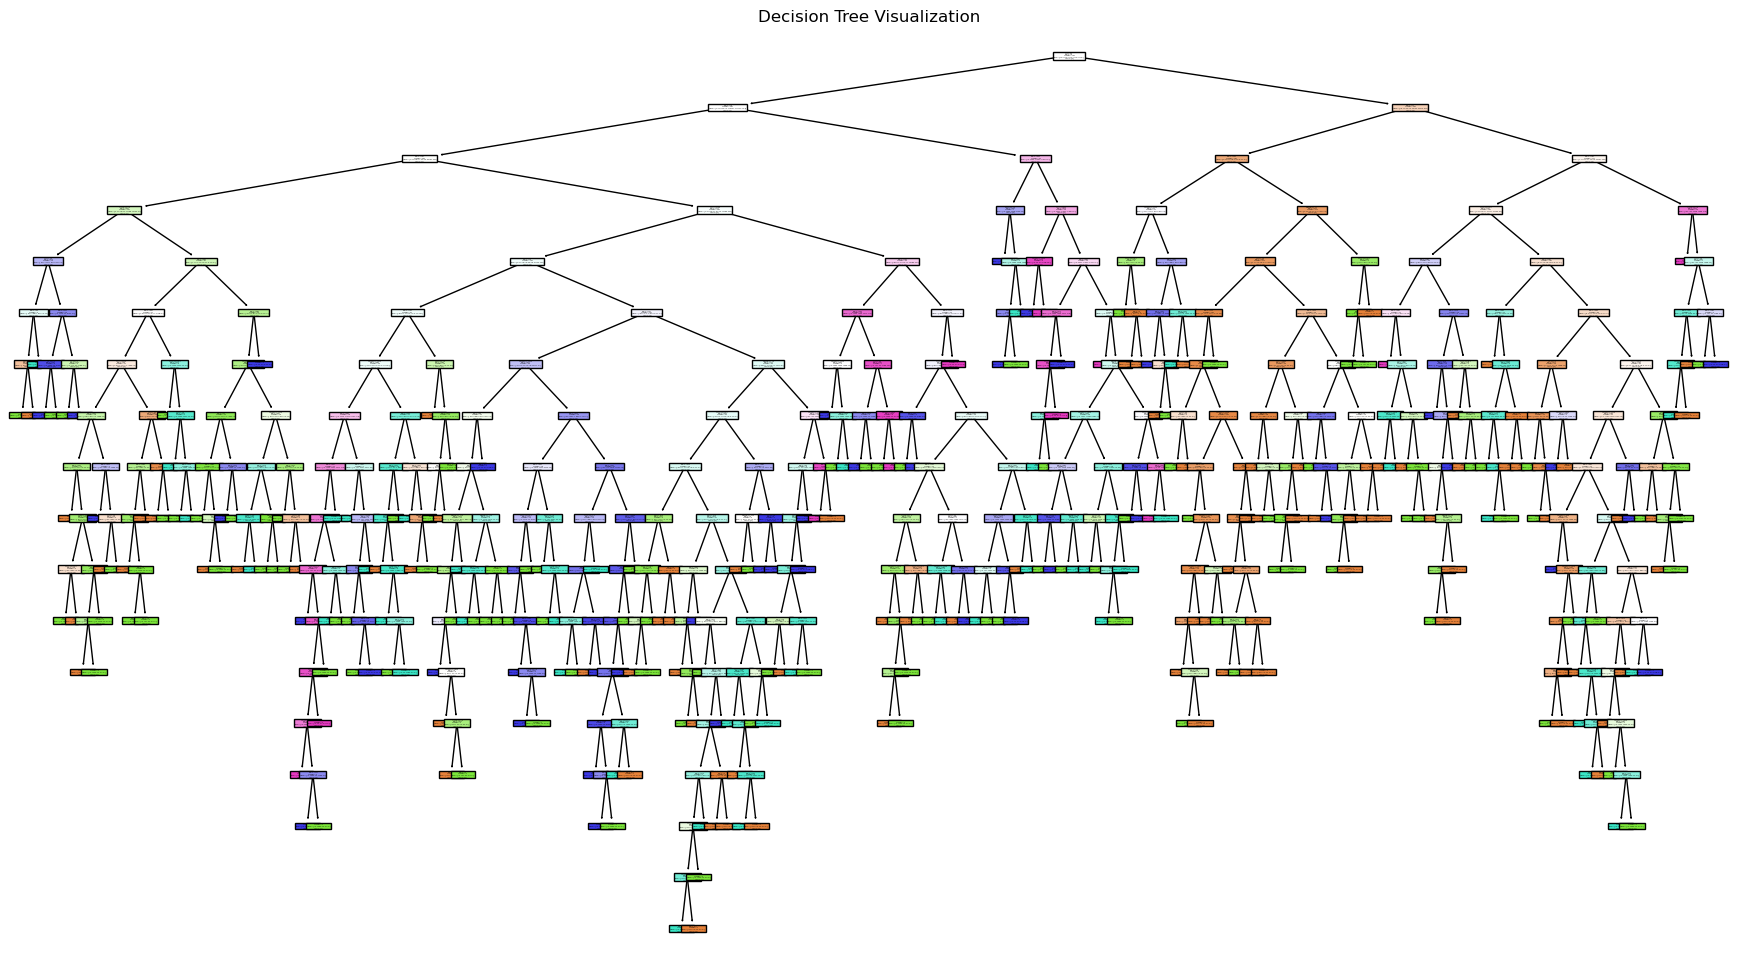

In [39]:
plt.figure(figsize=(22,12))
plot_tree(
    DT,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


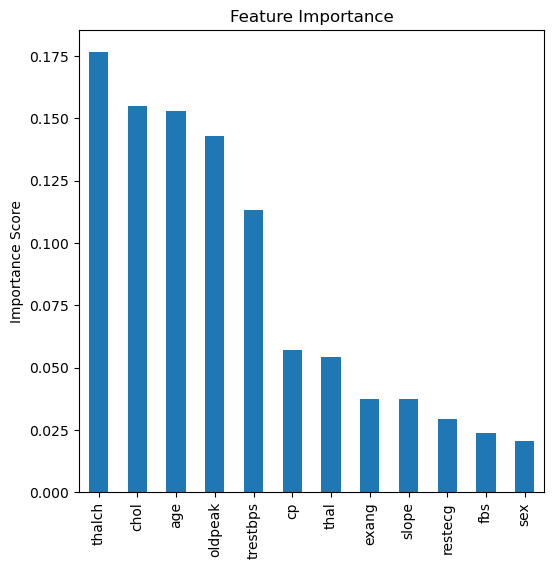

In [40]:
importance = pd.Series(
    DT.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(6,6))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


In [41]:
# with gini

DT_gini = DecisionTreeClassifier(criterion='gini',
                            splitter='best',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1)
DT_gini.fit(X_train, y_train)

y_train_pred_gini = DT_gini.predict(X_train)
y_test_pred_gini = DT_gini.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_train_pred_gini))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_test_pred_gini))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        80
           1       0.41      0.40      0.40        53
           2       0.05      0.05      0.05        22
           3       0.27      0.33      0.30        21
           4       0.25      0.17      0.20         6

    accuracy                           0.49       182
   macro avg       0.34      0.34      0.34  

In [42]:
# with entropy

DT_entropy = DecisionTreeClassifier(criterion='entropy',
                                    splitter='best',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1)
DT_entropy.fit(X_train, y_train)

y_train_pred_entropy = DT_entropy.predict(X_train)
y_test_pred_entropy = DT_entropy.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_train_pred_entropy))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_test_pred_entropy))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        80
           1       0.39      0.40      0.39        53
           2       0.27      0.18      0.22        22
           3       0.12      0.14      0.13        21
           4       0.12      0.17      0.14         6

    accuracy                           0.47       182
   macro avg       0.32      0.32      0.32  

### Hyperparameter Tuning (GridSearchCV)

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5],
             'min_samples_split':[1,3,5,7],
             'min_samples_leaf': [1,3,5,7,10,12]}



grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                   param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 12],
                         'min_samples_split': [1, 3, 5, 7]},
             scoring='accuracy')

In [45]:
best_DT = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 3}


In [46]:
y_train_pred_GS = best_DT.predict(X_train)
y_test_pred_GS = best_DT.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_train_pred_GS))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_test_pred_GS))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       319
           1       0.52      0.53      0.53       212
           2       0.33      0.36      0.34        87
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        22

    accuracy                           0.59       726
   macro avg       0.31      0.36      0.33       726
weighted avg       0.49      0.59      0.53       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        80
           1       0.40      0.40      0.40        53
           2       0.11      0.14      0.12        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.24      0.28      0.26  

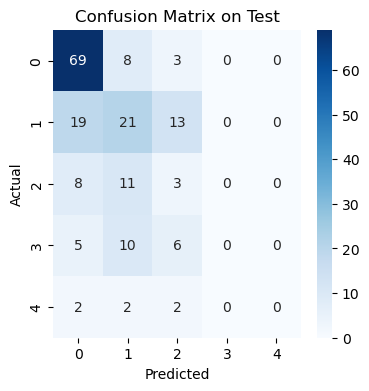

In [47]:
cm = confusion_matrix(y_test, y_test_pred_GS)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test")
plt.show()

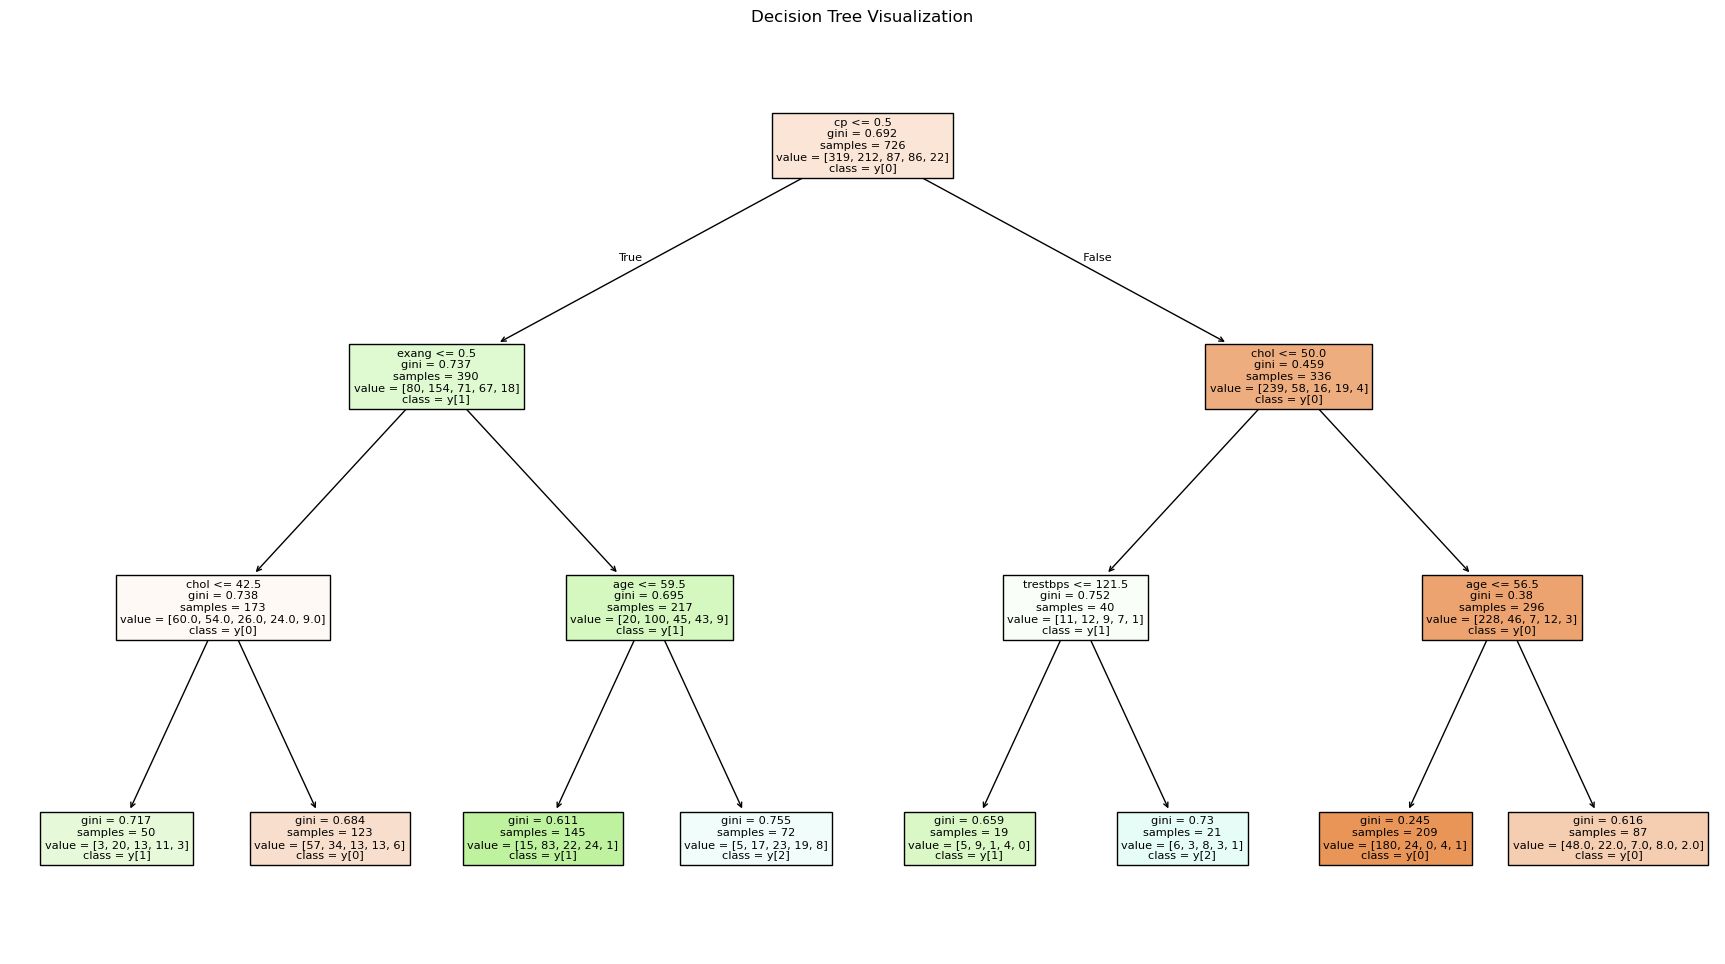

In [48]:
plt.figure(figsize=(22,12))
plot_tree(
    best_DT,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


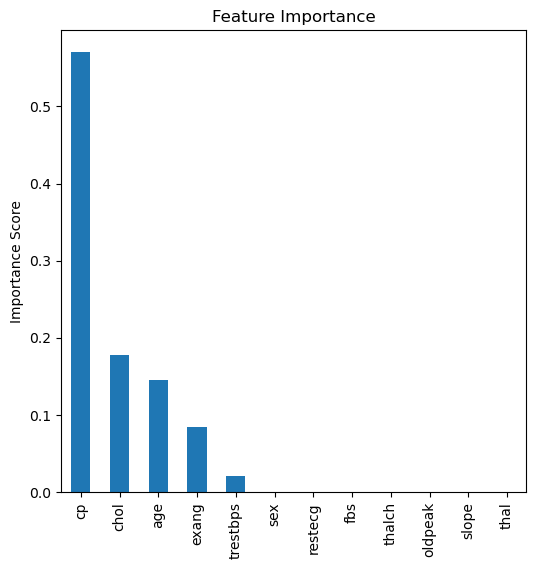

In [49]:
importance = pd.Series(
    best_DT.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(6,6))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


## Conclusion :

- The Model is Not GOOD
- Observed model performed well on training data but poorly on unseen data, which is a clear sign of overfitting.
- Observed Decision Tree model performed poorly due to overfitting and high variance.
- Cross-validation revealed that the model did not generalize well to unseen data.
- Decision Trees are interpretable but high-variance models
- Model is not achieving high predictive performance 

# Interview Questions

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

#### Decision Tree hyperparameters control how the tree grows and help prevent overfitting.

##### max_depth
- Maximum depth of the tree
- Small value → simple tree → may underfit
- Large value → complex tree → may overfit
- Controls model complexity
##### min_samples_split
- Minimum samples required to split a node
- Higher value → fewer splits → less overfitting
- Lower value → more splits → higher risk of overfitting

##### min_samples_leaf
- Minimum samples required in a leaf node
- Larger value smooths predictions
- Helps reduce noise and overfitting

##### criterion
- Measure used to split nodes
###### Common values:
- gini → faster, default
- entropy → information gain based

--Decision Tree hyperparameters control tree complexity and help balance underfitting and overfitting.

### Difference between Label Encoding and One-Hot Encoding

- Both are used to convert categorical data into numerical form.

#### Label Encoding
- Assigns an integer to each category [ Low → 0, Medium → 1, High → 2 ]
- Example:
- Use when Categories have natural order

##### Advantages:
- Simple and memory-efficient
- Works well for ordinal data

##### Disadvantages:
- Introduces false order for nominal data
- May mislead models
-----------------------------------------------------------------------------

#### One-Hot Encoding
- Creates separate binary columns for each category [Ex: color-Red,Blue,Green = 1,0,0]
- Use when Categories have no order

##### Advantages:
- No false ordering
- Best for nominal data

##### Disadvantages:
- Increases number of features
- Can cause high dimensionality


| Feature         | Label Encoding | One-Hot Encoding    |
| --------------- | -------------- | ------------------- |
| Order preserved | Yes            | No                  |
| Suitable for    | Ordinal data   | Nominal data        |
| Columns created | 1              | Multiple            |
| Risk            | False order    | High dimensionality |
